# Youtube Data Analytics Dashboard

## Data Visualization - Mini Project

    Ayush Abrol B20AI052
    Aryan Tiwari B20AI056

---

### Necessary Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from googleapiclient.discovery import build
import pycountry
from cleantext import clean
from langdetect import detect, LangDetectException
from textblob import TextBlob
import streamlit as st
import unidecode
import warnings
import demoji
import re
warnings.filterwarnings('ignore')

c:\Users\Ayush Abrol\AppData\Local\Programs\Python\Python37\lib\site-packages\requests\__init__.py:104: RequestsDependencyWarning: urllib3 (1.26.15) or chardet (5.1.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  RequestsDependencyWarning)


### Fetching video using Youtube API

In [3]:
api_key = '<ADD_YOUR_OWN_API_KEY_HERE>'

video_id = '0zGcUoRlhmw'
youtube = build('youtube', 'v3', developerKey=api_key)
video_response = youtube.commentThreads().list(
    part='snippet,replies',
    videoId=video_id,
    maxResults=200,
    order='relevance',
    textFormat='plainText'
).execute()

2023-04-28 21:54:02.205 INFO    googleapiclient.discovery_cache: file_cache is only supported with oauth2client<4.0.0


### Fetching video comments using Youtube API

In [4]:
# empty list for storing reply
comments = []

# extracting required info from each result object
for item in video_response['items']:

  # Extracting comments
  comment = item['snippet']['topLevelComment']['snippet']['textOriginal']
  # Extracting author
  author = item['snippet']['topLevelComment']['snippet']['authorDisplayName']
  # Extracting published time
  published_at = item['snippet']['topLevelComment']['snippet']['publishedAt']
  # Extracting likes
  like_count = item['snippet']['topLevelComment']['snippet']['likeCount']
  # Extracting total replies to the comment
  reply_count = item['snippet']['totalReplyCount']

  comments.append([author, comment, published_at, like_count, reply_count])

### Number of comments

In [5]:
len(comments)

100

### Viewing first 10 comments

In [6]:
comments[0:10]

[['Celestial',
  '“4 years no call” hits different when it’s actually been 4 years since this song dropped....',
  '2020-12-18T22:20:44Z',
  7236,
  52],
 ['Luiz Henrique Rodrigues',
  'Music is hands down the closest thing we have to a time machine. Period.',
  '2022-12-04T03:38:16Z',
  1103,
  19],
 ['Human Being',
  'The song doesn’t hit hard when it has a good beat, it hits hard when you can relate.',
  '2022-12-16T06:08:58Z',
  619,
  11],
 ['Kayla Gorrano',
  'The day this video was released was the day my daughter was born. I’ll never forget it. Now we sing to it! This song and “Clover Cage - Learning To Love Myself” are the two songs that helped get rid of my depression. I just want to send love to everyone and I want everyone to know things will get better. We are in this together..I love you',
  '2023-04-22T16:25:18Z',
  5,
  0],
 ['レディースショーツマニア', 'これも相当よく聴いたなぁ〜♪', '2022-06-13T16:41:18Z', 10, 0],
 ['Arif Maulana',
  'this song will never disappear, and become memories',
  '20

### Creating a comment dataframe

In [7]:
df = pd.DataFrame({'Author': [i[0] for i in comments], 
                   'Comment': [i[1] for i in comments], 
                   'Timestamp': [i[2] for i in comments],
                  'Likes': [i[3] for i in comments], 
                  'TotalReplies': [i[4] for i in comments]})

In [8]:
df

,Author,Comment,Timestamp,Likes,TotalReplies
0,Celestial,“4 years no call” hits different when it’s act...,2020-12-18T22:20:44Z,7236,52
1,Luiz Henrique Rodrigues,Music is hands down the closest thing we have ...,2022-12-04T03:38:16Z,1103,19
2,Human Being,The song doesn’t hit hard when it has a good b...,2022-12-16T06:08:58Z,619,11
3,Kayla Gorrano,The day this video was released was the day my...,2023-04-22T16:25:18Z,5,0
4,レディースショーツマニア,これも相当よく聴いたなぁ〜♪,2022-06-13T16:41:18Z,10,0
...,...,...,...,...,...
95,trini,"Me trae lindos recuerdos, apenas tenía 15 años...",2022-08-17T04:10:21Z,80,1
96,Yara Lemos Ribeiro,"Eu amo essa música, e eles são lindos demais.",2023-04-04T12:17:54Z,3,1
97,Sim Joh,I used to really not like this song when it wa...,2022-11-14T15:09:55Z,6,2
98,Saibhairav Chainsmoker,No autotune for halsey voice,2023-01-18T16:08:26Z,1,0


### Preprocessing the text data

In [9]:
# Remove extra spaces and make them lower case. Replace special emojis
clean_df = df
clean_df['Comment'] = clean_df['Comment'].apply(lambda x: x.strip().lower().replace('xd','').replace('<3',''))

# Clean text from line breaks, unicodes, emojis and punctuations
clean_df['Comment'] = clean_df['Comment'].apply(lambda x: clean(x, clean_all=True, lowercase=True, punct=False))

# Remove emojis
clean_df['Comment'] = clean_df['Comment'].apply(lambda x: demoji.replace(x, ''))

# Remove quotes and double quotes
clean_df['Comment'] = clean_df['Comment'].apply(lambda x: x.replace('"','').replace("'",''))

# Remove non-ascii characters
clean_df['Comment'] = clean_df['Comment'].apply(lambda x: unidecode.unidecode(x))

clean_df

,Author,Comment,Timestamp,Likes,TotalReplies
0,Celestial,"""4 years no call"" hits different when it's act...",2020-12-18T22:20:44Z,7236,52
1,Luiz Henrique Rodrigues,music is hands down the closest thing we have ...,2022-12-04T03:38:16Z,1103,19
2,Human Being,the song doesn't hit hard when it has a good b...,2022-12-16T06:08:58Z,619,11
3,Kayla Gorrano,the day this video was released was the day my...,2023-04-22T16:25:18Z,5,0
4,レディースショーツマニア,koremoXiang Dang yokuTing itanaa~,2022-06-13T16:41:18Z,10,0
...,...,...,...,...,...
95,trini,"me trae lindos recuerdos, apenas tenia 15 anos...",2022-08-17T04:10:21Z,80,1
96,Yara Lemos Ribeiro,"eu amo essa musica, e eles sao lindos demais.",2023-04-04T12:17:54Z,3,1
97,Sim Joh,i used to really not like this song when it wa...,2022-11-14T15:09:55Z,6,2
98,Saibhairav Chainsmoker,no autotune for halsey voice,2023-01-18T16:08:26Z,1,0


### Displaying the preprocessed text

In [10]:
display(clean_df['Comment'])

0     "4 years no call" hits different when it's act...
1     music is hands down the closest thing we have ...
2     the song doesn't hit hard when it has a good b...
3     the day this video was released was the day my...
4                    koremoXiang Dang yokuTing itanaa~ 
                            ...                        
95    me trae lindos recuerdos, apenas tenia 15 anos...
96       eu  amo essa musica, e eles sao lindos demais.
97    i used to really not like this song when it wa...
98                         no autotune for halsey voice
99    am i the only one here watching this in 2020 a...
Name: Comment, Length: 100, dtype: object

### Fetching language of the comments

In [11]:
from langdetect import detect, LangDetectException
def det_lang(language):
    try:
        lang = detect(language)
    except LangDetectException:
        lang = 'Other'
    return lang

In [12]:
clean_df['Language'] = clean_df['Comment'].apply(det_lang)
clean_df.head()

,Author,Comment,Timestamp,Likes,TotalReplies,Language
0,Celestial,"""4 years no call"" hits different when it's act...",2020-12-18T22:20:44Z,7236,52,en
1,Luiz Henrique Rodrigues,music is hands down the closest thing we have ...,2022-12-04T03:38:16Z,1103,19,en
2,Human Being,the song doesn't hit hard when it has a good b...,2022-12-16T06:08:58Z,619,11,en
3,Kayla Gorrano,the day this video was released was the day my...,2023-04-22T16:25:18Z,5,0,en
4,レディースショーツマニア,koremoXiang Dang yokuTing itanaa~,2022-06-13T16:41:18Z,10,0,tl


In [13]:
import pycountry
clean_df['Language'] = clean_df['Language'].apply(lambda x: pycountry.languages.get(alpha_2=x).name if(x) != 'Other' else 'Not-Detected')
clean_df.head()

,Author,Comment,Timestamp,Likes,TotalReplies,Language
0,Celestial,"""4 years no call"" hits different when it's act...",2020-12-18T22:20:44Z,7236,52,English
1,Luiz Henrique Rodrigues,music is hands down the closest thing we have ...,2022-12-04T03:38:16Z,1103,19,English
2,Human Being,the song doesn't hit hard when it has a good b...,2022-12-16T06:08:58Z,619,11,English
3,Kayla Gorrano,the day this video was released was the day my...,2023-04-22T16:25:18Z,5,0,English
4,レディースショーツマニア,koremoXiang Dang yokuTing itanaa~,2022-06-13T16:41:18Z,10,0,Tagalog


### Stats

In [14]:
clean_df.count()

Author          100
Comment         100
Timestamp       100
Likes           100
TotalReplies    100
Language        100
dtype: int64

In [15]:
clean_df.drop(clean_df[clean_df['Language'] == 'Not-Detected'].index, inplace = True)

In [16]:
clean_df.count()

Author          100
Comment         100
Timestamp       100
Likes           100
TotalReplies    100
Language        100
dtype: int64

### TextBlob

In [17]:
from nltk.sentiment.util import *
from textblob import TextBlob
from nltk import tokenize
# New variable for TextBlob approach
textBlob = clean_df.loc[clean_df['Language']=='English']

def get_polarity(text):
  return TextBlob(text).sentiment.polarity

textBlob['TextBlob_Polarity'] = textBlob['Comment'].apply(get_polarity)

### Peerforming Sentiment Analysis on comments using TextBlob

In [18]:
textBlob['TextBlob_Sentiment_Type']=''
textBlob.loc[textBlob.TextBlob_Polarity>0,'TextBlob_Sentiment_Type']='POSITIVE'
textBlob.loc[textBlob.TextBlob_Polarity==0,'TextBlob_Sentiment_Type']='NEUTRAL'
textBlob.loc[textBlob.TextBlob_Polarity<0,'TextBlob_Sentiment_Type']='NEGATIVE'

### Stats of the sentiment analysis

In [19]:
textBlob.TextBlob_Sentiment_Type.value_counts()

POSITIVE    41
NEUTRAL     15
NEGATIVE     8
Name: TextBlob_Sentiment_Type, dtype: int64

### Plotting bar graph of sentiments

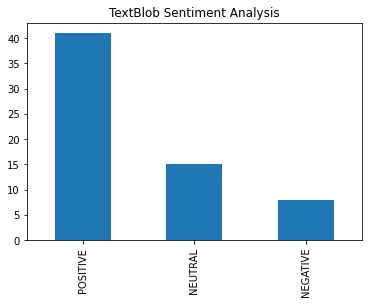

In [20]:
textBlob.TextBlob_Sentiment_Type.value_counts().plot(kind='bar',title="TextBlob Sentiment Analysis")
plt.savefig('./plots/TextBlob_Sentiment_Analysis.png', bbox_inches='tight')

### Vader

In [21]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

vader_df = clean_df.loc[clean_df['Language']=='English']

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to C:\Users\Ayush
[nltk_data]     Abrol\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [22]:
vader_df['vader_scores'] = vader_df['Comment'].apply(lambda Comment: sid.polarity_scores(Comment))
vader_df.head()

,Author,Comment,Timestamp,Likes,TotalReplies,Language,vader_scores
0,Celestial,"""4 years no call"" hits different when it's act...",2020-12-18T22:20:44Z,7236,52,English,"{'neg': 0.136, 'neu': 0.864, 'pos': 0.0, 'comp..."
1,Luiz Henrique Rodrigues,music is hands down the closest thing we have ...,2022-12-04T03:38:16Z,1103,19,English,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,Human Being,the song doesn't hit hard when it has a good b...,2022-12-16T06:08:58Z,619,11,English,"{'neg': 0.0, 'neu': 0.718, 'pos': 0.282, 'comp..."
3,Kayla Gorrano,the day this video was released was the day my...,2023-04-22T16:25:18Z,5,0,English,"{'neg': 0.046, 'neu': 0.706, 'pos': 0.248, 'co..."
5,Arif Maulana,"this song will never disappear, and become mem...",2023-04-26T18:50:04Z,3,0,English,"{'neg': 0.0, 'neu': 0.808, 'pos': 0.192, 'comp..."


In [23]:
vader_df['compound'] = vader_df['vader_scores'].apply(lambda score_dict: score_dict['compound'])
vader_df['vader_sentiment_type']=''
vader_df.loc[vader_df.compound>0,'vader_sentiment_type']='POSITIVE'
vader_df.loc[vader_df.compound==0,'vader_sentiment_type']='NEUTRAL'
vader_df.loc[vader_df.compound<0,'vader_sentiment_type']='NEGATIVE'

In [24]:
vader_df.vader_sentiment_type.value_counts()

POSITIVE    34
NEUTRAL     18
NEGATIVE    12
Name: vader_sentiment_type, dtype: int64

<AxesSubplot:title={'center':'sentiment analysis'}>

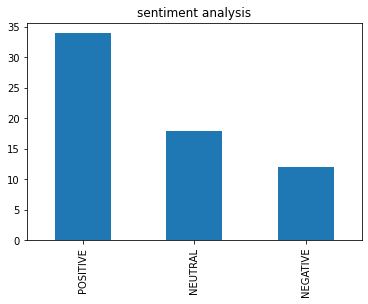

In [25]:
vader_df.vader_sentiment_type.value_counts().plot(kind='bar',title="sentiment analysis")

In [26]:
vader_df.groupby(['vader_sentiment_type']).head()

,Author,Comment,Timestamp,Likes,TotalReplies,Language,vader_scores,compound,vader_sentiment_type
0,Celestial,"""4 years no call"" hits different when it's act...",2020-12-18T22:20:44Z,7236,52,English,"{'neg': 0.136, 'neu': 0.864, 'pos': 0.0, 'comp...",-0.2960,NEGATIVE
1,Luiz Henrique Rodrigues,music is hands down the closest thing we have ...,2022-12-04T03:38:16Z,1103,19,English,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEUTRAL
2,Human Being,the song doesn't hit hard when it has a good b...,2022-12-16T06:08:58Z,619,11,English,"{'neg': 0.0, 'neu': 0.718, 'pos': 0.282, 'comp...",0.5411,POSITIVE
3,Kayla Gorrano,the day this video was released was the day my...,2023-04-22T16:25:18Z,5,0,English,"{'neg': 0.046, 'neu': 0.706, 'pos': 0.248, 'co...",0.9367,POSITIVE
5,Arif Maulana,"this song will never disappear, and become mem...",2023-04-26T18:50:04Z,3,0,English,"{'neg': 0.0, 'neu': 0.808, 'pos': 0.192, 'comp...",0.1695,POSITIVE
6,RJ,"2016: ""we ain't ever gettin older"" \n4 years l...",2021-02-07T23:42:17Z,1675,55,English,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEUTRAL
8,Suhas,take me back to 2013-2017.. those years where ...,2023-02-09T17:19:36Z,227,9,English,"{'neg': 0.0, 'neu': 0.756, 'pos': 0.244, 'comp...",0.6369,POSITIVE
12,- tyara elisya -,they had more chemistry than my science class.,2019-12-19T13:46:18Z,5944,40,English,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEUTRAL
13,Ying EDM,can't believe it's been years. sitting alone i...,2022-09-20T00:53:30Z,131,3,English,"{'neg': 0.186, 'neu': 0.814, 'pos': 0.0, 'comp...",-0.5837,NEGATIVE
15,Khadija Ilyas,"this song is so nostalgic, reminds me of simpl...",2023-03-19T05:36:16Z,74,4,English,"{'neg': 0.0, 'neu': 0.793, 'pos': 0.207, 'comp...",0.8730,POSITIVE


After the initial analysis and visual inspection. There are more positive and negative counts using TextBlob than Vader.

I think TextBlob is closer to the sentiment outcomes that I expect. Hence picking TextBlob for Sentiment analysis.

## Dashboard

A few insights that we draw:

    1. Top 10 liked comments
    2. Top 10 replies comments
    3. Top languages commented in
    4. Sentiment analysis on the English comments
    5. Metrics: Likes and subscribes
    6. Time series chart showing subs gained and Viewer hits

In [27]:
import os

import google_auth_oauthlib.flow
import googleapiclient.discovery
import googleapiclient.errors

In [28]:
api_service_name = "youtube"
api_version = "v3"
client_secrets_file = "client_secret.json"

In [ ]:
flow = google_auth_oauthlib.flow.InstalledAppFlow.from_client_secrets_file(client_secrets_file, scopes=["https://www.googleapis.com/auth/youtube.force-ssl"])
credentials = flow.run_console()
youtube = googleapiclient.discovery.build(api_service_name, 
                                          api_version, 
                                          credentials=credentials)

request = youtube.videos().list(
        part="snippet,contentDetails,statistics",
        id="dQw4w9WgXcQ")
response = request.execute()

print(response)

### Functions for the dashboard

In [29]:
url = "https://www.youtube.com/watch?v=6GUm5g8SG4o"

In [30]:
video_id = url.split('?v=')[-1]
video_id

'6GUm5g8SG4o'

In [31]:
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

In [32]:
def get_sentiment(polarity):
   if polarity > 0:
    return 'POSITIVE'
   elif polarity<0:
    return 'NEGATIVE' 
   else:
     return 'NEUTRAL'

In [33]:
def parse_video(url) -> pd.DataFrame:
    """
    Args:
      url: URL Of the video to be parsed
    Returns:
      Dataframe with the processed and cleaned values
    """
    api_key = ''
    # Get the video_id from the url
    video_id = url.split('?v=')[-1]

    # creating youtube resource object
    youtube = build('youtube', 'v3',
    developerKey=api_key)

    # retrieve youtube video results
    video_response=youtube.commentThreads().list(
    part='snippet',
    maxResults=1000,
    order='relevance',
    videoId=video_id
    ).execute()

    # empty list for storing reply
    comments = []

    # extracting required info from each result object
    for item in video_response['items']:

        # Extracting comments
        comment = item['snippet']['topLevelComment']['snippet']['textOriginal']
        # Extracting author
        author = item['snippet']['topLevelComment']['snippet']['authorDisplayName']
        # Extracting published time
        published_at = item['snippet']['topLevelComment']['snippet']['publishedAt']
        # Extracting likes
        like_count = item['snippet']['topLevelComment']['snippet']['likeCount']
        # Extracting total replies to the comment
        reply_count = item['snippet']['totalReplyCount']

        comments.append([author, comment, published_at, like_count, reply_count])

    df = pd.DataFrame({'Author': [i[0] for i in comments], 
                      'Comment': [i[1] for i in comments], 
                      'Timestamp': [i[2] for i in comments],
                    'Likes': [i[3] for i in comments], 
                    'TotalReplies': [i[4] for i in comments]})
    
    # Remove extra spaces and make them lower case. Replace special emojis
    df['Comment'] = df['Comment'].apply(lambda x: x.strip().lower().replace('xd','').replace('<3',''))

    # Clean text from line breaks, unicodes, emojis and punctuations
    df['Comment'] = df['Comment'].apply(lambda x: clean(x, clean_all=True, lowercase=True, punct=False))

    # Remove emojis
    df['Comment'] = df['Comment'].apply(lambda x: demoji.replace(x, ''))

    # Remove quotes and double quotes
    df['Comment'] = df['Comment'].apply(lambda x: x.replace('"','').replace("'",''))

    # Remove non-ascii characters
    df['Comment'] = df['Comment'].apply(lambda x: unidecode.unidecode(x))

    # Detect the languages of the comments
    df['Language'] = df['Comment'].apply(lambda x: detect(x))

    # Convert ISO country codes to Languages
    df['Language'] = df['Language'].apply(lambda x: pycountry.languages.get(alpha_2=x).name)

    # Determining the polarity based on english comments
    df['TextBlob_Polarity'] = df[['Comment','Language']].apply(lambda x: get_polarity(x['Comment']) if x['Language'] == 'English' else '', axis=1)

    df['TextBlob_Sentiment_Type'] = df['TextBlob_Polarity'].apply(lambda x: get_sentiment(x) if type(x)==float else '')

    return df

In [34]:
df3 = parse_video('https://www.youtube.com/watch?v=6GUm5g8SG4o')
df3.head()

2023-04-28 21:59:11.984 INFO    googleapiclient.discovery_cache: file_cache is only supported with oauth2client<4.0.0


,Author,Comment,Timestamp,Likes,TotalReplies,Language,TextBlob_Polarity,TextBlob_Sentiment_Type
0,Sebastiano,honestly i miss the days where songs like this...,2021-03-31T16:47:22Z,12172,189,English,0.45,POSITIVE
1,Samriddhi,almost 8years and this song is still a masterp...,2023-04-26T13:39:42Z,27,1,English,0.0,NEUTRAL
2,Michael Smith,this song never gets old.,2023-01-05T14:43:05Z,1238,9,English,0.1,POSITIVE
3,Shoaib khan,lyrics\nif i got locked away\nand we lost it a...,2023-03-02T23:00:34Z,470,9,English,0.303175,POSITIVE
4,Chisom Leonard,this is 2023 and this piece of magic is still ...,2023-01-14T19:35:55Z,938,6,English,0.75,POSITIVE
